In [1]:
import numpy as np
from qiskit import Aer
from qiskit import QuantumCircuit, transpile, execute
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

In [2]:
# get list of qbits from start to end excluding target qubit
def get_list_minus_node(startQb: int, endQb: int, target: int, ref: int):
    list = [i for i in range(startQb, endQb+1) if i != target]
    list.append(ref)
    return list

In [3]:
# generate cnot gates for given reference and start qubit 
def gen_cnot_nodes(qc, refQb: int, startQb: int, endQb: int):
    for target in range(endQb, startQb-1, -1):
        list = get_list_minus_node(startQb, target, target, refQb)
        qc.mcx(list, target)

In [4]:
# generates quantum circuit for 2 binary numbers  
def create_circuit(a, b):
    qc = QuantumCircuit(8, 4)
    
    a = a[::-1]
    b = b[::-1]
    
    # by dedault each qubit is in state 0, need to rewrite accroding to a and b
    for i in range(0, 4):
        if (a[i] == '1'):
            qc.x(i)
            
    for i in range(0, 4):
        if (b[i] == '1'):
            qc.x(i+4)    
    
    qc.barrier()
    
    # generate mcx gates for each q4-q7 qubits as a refQb
    for i in range(4):
        gen_cnot_nodes(qc, i+4, i, 3)
        
    qc.barrier()
    
    for i in range(4):
        qc.measure(i,i)
    
    
    return qc


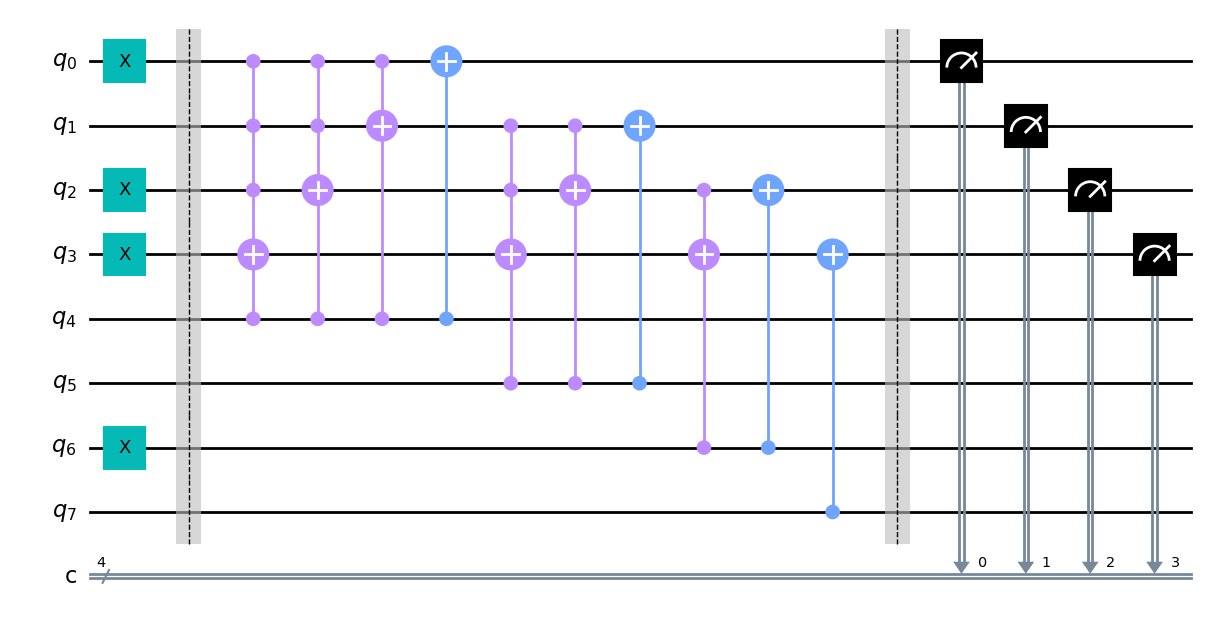

In [5]:
# example 1
a = '1101'  # 13
b = '0100' # 4
circuit = create_circuit(a, b)
circuit.draw(output="mpl")

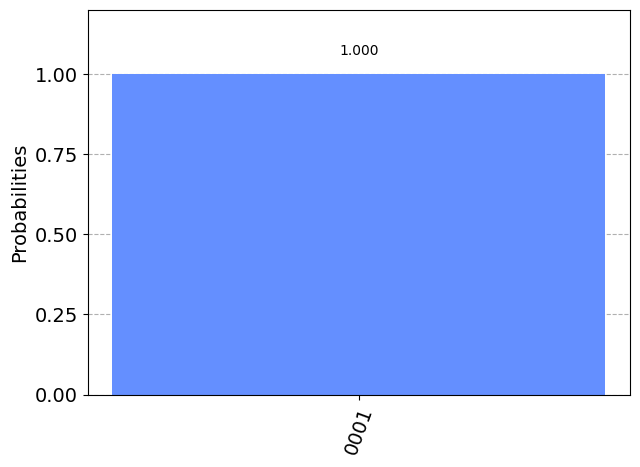

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(circuit).result()
counts = result.get_counts()

plot_histogram(counts)
# result should be 0001 (17 mod 16)

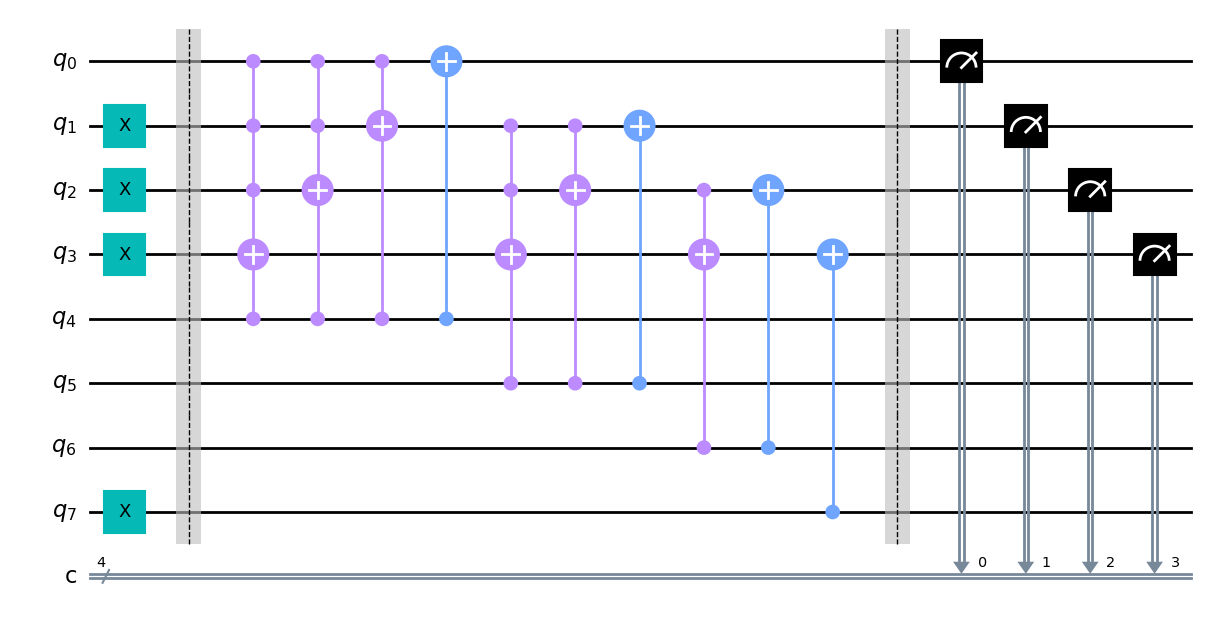

In [7]:
# example 2
a = '1110'  # 14
b = '1000' # 8
circuit2 = create_circuit(a, b)
circuit2.draw(output="mpl")

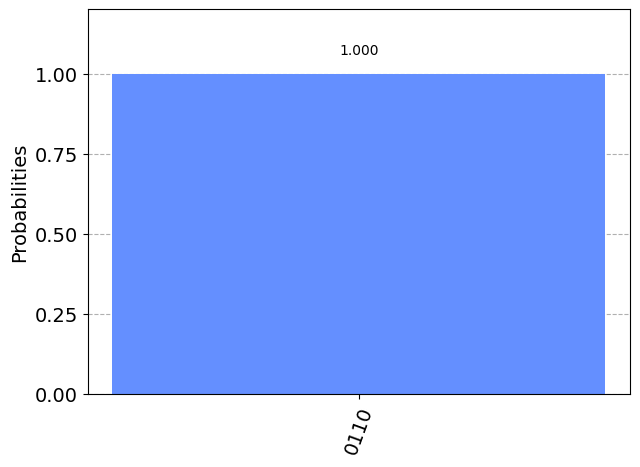

In [8]:
result2 = simulator.run(circuit2).result()
counts2 = result2.get_counts()

plot_histogram(counts2)
# result should be 0110 (22 mod 16)